# Gaussian mixtures

<img src= 'img\gmm_1.png'>

**Es un modelo generativo**: Se asume que un modelo probabilista es el que produce el conjunto de datos


# Teoría

## Métodos probabilistas

Un algoritmo de agrupamiento probabilista intenta encontrar, a partir de un conjunto de datos de entrenamiento
(datos observados), el mejor ajuste del modelo generador que se esté asumiendo. La aproximación más común es asumir que el **modelo probabilístico generador de los datos es una mixtura de distribuciones de probabilidad (normalmente, una mixtura gaussiana)**.

<img src= 'img/GMM1.png'>

**Cada componente (distribución)** de la mixtura **representaría un clúster** y, de esta manera, se pueden separar los ejemplos del conjunto de entrenamiento en clústeres. Diremos que **un ejemplo pertenece al clúster cuya componente le otorga mayor probabilidad.**

las **técnicas probabilísticas** de agrupamiento **permiten considerar pertenencias probabilísticas** (no deterministas) de ejemplos a clústeres, es decir, un ejemplo podría pertenecer a la vez a diferentes clústeres con diferente probabilidad.

## Algoritmo Gaussian mixtures GMM

El modelo **GMM es un modelo probabilista** que asume que **las instancias fueron generadas a partir de una mezcla (mixture) de varias distribuciones gaussianas** de las cuales sus **parametros son desconocidos**, es decir, que cuando observamos una instancia sabemos que fue generada por una de las distribuciones del modelo, pero no sabemos de cual, y tampoco conocemos los parámetros de esa distribución.

**Cada distribución** de la mezcla o mixtura forman **un cluster** que tipicamente tiene una **forma elíptica**. Cada cluster puede tener diferente forma, tamaño, densidad, y orientación.

Su principal problema o **desventaja** es que debemos **saber de antemano** la cantidad de distribuciones que hay, dicho de otra manera, debemos saber o estimar de antemano **la cantidad de $K$ clusters**.

Existen muchas variantes de GMM, pero la más simple implementación asume que el dataset $X$ a sido generado a partir del siguiente proceso probabilistico: 

- **Seleccionar componente $j$ de los $K$ clusters**: Para cada instancia una distribución gaussiana es seleccionada aleatoriamente de entre los $K$ clusters. La probabilidad de de elejir el $j$ esimo cluster  viene dado por el peso o coeficiente de mezcla de los clusters $\phi^{(j)}$. El indice del cluster elegido por la $i$ esima instancia es nombrado $z^{(i)}$ que indica la probabilidad de que un punto haya sido generado por cada una de las gaussianas.
- **Muestrear la distribución**: Si la $i$ esima instancia fue asignada al $j$ esimo cluster (es decir $z^{(i)} = j$), entonces la ubicaciónn de la instancia $x^{(i)}$ es muestreada aleatoriamente de una distribución gaussiana con media $\mu^{(j)}$, y matriz de covarianza $\Sigma^{(j)}$. La notación es la siguiente: 

$$x^{(i)}\sim \mathcal{N}(\mu^{(j)},\Sigma^{(j)})$$

Pero entonces **¿qué hace este modelo?**: Dado un dataset $X$, estima los pesos de los clusters $\phi$, y los parámetros de las distribuciones; medias $\mu^{(1)} \rightarrow \mu^{(k)}$, y covarianzas $\Sigma^{(1)} \rightarrow \Sigma^{(k)}$, y después calcula la probabilildad de que cada instancia pertenezca a cada distribución gaussiana (a cada cluster). La probabilidad biene dada por la siguiente función de densidad: 

$$p(x)= \sum_{j = 1}^{K}{\phi^{(j)}*p_j(x, \theta_j)}$$

Siendo: 

- Coeficientes de mezcla o pesos de los clusteres $\phi^{(j)}$
- Media de una distribución gaussiana o cluster $\mu^{(j)}$
- Covarianza de un cluster o distribución gaussiana $\Sigma^{(j)}$

Los coeficientes de mezcla o pesos de los clusters $\{\phi^{(0)}, \phi^{(1)},..., \phi^{(j)}\}$ denotan la probabilidad de que un punto sea la instanciación de cada una de las componentes. Cumplen que:

$$0 \leq \phi^{(j)} \leq 1  \forall j \subset \{1, 2, ..., K\} \land \sum_{j = 1}^{K} \phi^{(j)} = 1$$

**Nota**: la suma de las probabilidades de las pertenencias de una instancia $x{(i)}$ a cada cluster deben sumar 1.

$$p_j(x, \theta_j) = \mathcal{N}(\mu^{(j)},\Sigma^{(j)})$$

Donde:$$\theta_j = \mu^{(j)},\Sigma^{(j)}$$

Al final cada instancia del conjunto de datos tendrá asignada la probabilidad de pertenencia a cada uno de los clusters, es decir, cada dato pertenece a todos los clusters pero con diferente probabilidad, la instancia pertenecerá a la distribución cuya probabilidad sea la mayor.

### En resumen: 

**¿Que se busca con el módelo GMM? ¿cuál es su objetivo?**

1. Plantear un modelo generador y entenderlo
2. Estimar los parametros del modelo generador a partir de los datos

**¿Cómo lo hace?**

- Mediante el algoritmo Expectation-Maximization

## Algoritmo Expectation-Maximitation EM

El algoritmo **esperanza-maximización**, en adelante **EM**, es una estrategia **utilizada en entornos de aprendizaje donde existe información no observada**. En el caso de una mixtura gaussiana, **se asume la existencia de una variable aleatoria latente $z_i$ que determina la componente generadora del caso $x_i$**.

El EM es un **método iterativo** que combina la estimación de los valores no observados y el aprendizaje de los parámetros del modelo. En el caso concreto de una mixtura gaussiana, el algoritmo se podría resumir de la siguiente manera:

En la $t$ ésima iteración, usando el ajuste del modelo obtenido en la iteración $t – 1$, se obtiene una estimación de los vectores $z_i$ para todos los casos $x_i$ (con $i \subset \{1, ...,n\}$ ). Con esta nueva estimación de los vectores $z_i$ se aprende un nuevo ajuste del modelo $\mu_j,\Sigma_j, \phi_j$ y $j \subset \{1, ...,K\}$.


Pero **¿Que es lo que trata de optimizar este método?**

La **verosimilitud** entre los datos reales y los generados por el modelo mediante sus parametros actuales.

### Verosimilitud

En el lenguaje del día a día **probabilidad y verosimilitud** son conceptos se utilizan de manera equitativa, sin embargo, en la estadística tienen dos significados muy diferentes; Dado un modelo estadístico con los parametros $\theta$, la palabra **probabilidad** se utiliza para describir **como o cuanto de plausible es un evento futuro $x$ (sabiendo los parametros $\theta$)**, mientras que la palabra **verosimilitud** describe **como de posibles son unos particulares parámetros $\theta$, habiendo observado el evento $x$**.

En resumen; la función de densidad, es un función de probabilidad de un evento $x$ con  $\theta$ fijado, mientras que la función de verosimilitud es una función de  $\theta$ con un evento $x$ fijado. 

Es importante entender que la verosimilitud no es NO es una distribución de probabilidad. La suma de las probabilidades de los posibles valores de un evento $x$ suman 1, sin embargo, la verosimilitud integrada a todos los posibles parámetros de $\theta$ puede ser cualquier valor.

Por lo tanto, en un contexto probabilístico, la **verosimilitud se define como la plausibilidad de un conjunto de parámetros $\Theta$ de un modelo dado un conjunto de datos observados**. Se calcula como la probabilidad asignada al conjunto de datos observado por el modelo parametrizado mediante $\Theta$:

$$L(\Theta | \{x_1, ..., x_n\}) = \prod_{i=1}^n p(\{x_i| \Theta)$$

Donde: $$\Theta = \{ \phi_1, ..., \phi_k, \theta_1, ..., \theta_k\}$$

Y se recuerda que: $$\theta_j = \mu^{(j)},\Sigma^{(j)}$$

En la práctica el valor de los parámetros del conjunto $\Theta$ es desconocido. Los valores de los parámetros deben ser estimados a partir de los datos. En este caso, es necesario computar los parámetros de las distribuciones de probabilidad de las distintas componentes $\{ \theta_1, ..., \theta_k\}$ y su combinación mediante los coeficientes $\{ \phi_1, ..., \phi_k\}$.

El método de estimación de parámetros es conocido como el método de estimación de parámetros máximo verosímiles. Se buscan mediante un proceso de optimización los parámetros $\Theta$ que maximizan la función$L(\Theta | \{x_1, ..., x_n\})$

$$ \Theta_{MaxLikelihood} = argmax(L(\Theta | \{x_1, ..., x_n\}))$$

Por suerte maximizar su la función de verosimilitud y maximizar su logaritmo son equivalentes, y resulta más facil maximizar lo segundo, por lo tanto, se buscan los valores de $\Theta$ que maximizan el logaritmo de la verosimilitud: 

$$ \Theta_{ML} = argmax(log(L(\Theta | \{x_1, ..., x_n\}))) = argmax(\sum_{i=1}^n log(p(x_i|\theta)))$$

De esta manera, se estiman a partir del conjunto de datos disponible los parámetros máximo verosímiles $\Theta_{ML}= \{ \phi_1, ..., \phi_k, \mu_1, ..., \mu_k, \Sigma_1, ..., \Sigma_n\}$. Estos parámetros tienen sus propias fórmulas cerradas que no se van a mostrar aqui por simplicidad.

$z$ es un vector probabilista que asigna a cada instancia $x_i$ cada componente $k$ con cierta probabilidad (es la probabilidad de pertenencia de una instancia a cada cluster). La probabilidad $z_{ik}$ de que la componente $k$ (donde $j \subset \{1, ..., K\}$, es decir en estos apuntes $K$ minuscula y $j$ pueden estar intercambiados pero significan los mismo; hacen referencia un cluster de todos los K clusters)sea la distribución de probabilidad generadora del caso $x_i$ puede estimarse a partir del conjunto de datos como la probabilidad condicionada de $z_i$ dado $x_i$ (dado un punto cual es la probabilidad de que pertenezca a un cluster o cada gaussiana) aplicando la regla de Bayes.

$$z_{k} = z_{j} = p(z_{ij} = 1|x_i) = \frac {\phi_j \mathcal{N}(x_i | \mu_j,\Sigma_j)}{\sum_{j=1}^K \phi_j \mathcal{N}(x_i | \mu_j,\Sigma_j)}$$


Observesé la **interdependencia entre los parámetros y valores necesarios para aprender el modelo en sus respectivas fórmulas**. El valor de los vectores $z_i$ t , desconocido en el momento del aprendizaje, es usado para los estimadores máximo verosímiles, $\mu^{(j)},\Sigma^{(j)}, \phi^{(j)}$. A su vez, un ajuste del modelo, $\Theta_{ML}$ , es necesario para calcular la probabilidad condicionada que da valor a los vectores $z_i$. Esta doble dependencia sugiere una solución iterativa que no es otra cosa que un caso particular del popular algoritmo esperanza-maximización.

# Práctica

## Pseudocódigo del algoritmo EM aplicado a GMM

1. Se inicializa el modelo con parametros $\mu_k, \Sigma_k,\phi_k, k\subset\{1, ..., K\}$ aleatorios.
2. Se repiten iterativamente los dos siguientes pasos: <blockquote>
    
- 2.1 PASO E: estimar el valor de los vectores de $z_i$ dado el modelo del paso previo $\Theta^{t-1}$.
- 2.2 PASO M: Calcular los estimadores máximos verosimiles $\mu_k, \Sigma_k,\phi_k$ dados los nuevos valores de los vectores $z_i$.
<blockquote>

Repetir este proceso hasta que la verosimilitud converga: 
    
$$ |  L(\Theta^t | \{x_1, ..., x_n\}) - L(\Theta^{t-1} | \{x_1, ..., x_n\}) < 1$$

<img src= 'img/gmm_converge.png'>


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
import seaborn as sns; sns.set()
import numpy as np

## Las debilidades del k-Means en un toy example

Está claro que el k-means es un algoritmo muy utilizado dentro del clustering, pero tiene sus debilidades.

Vamos a entenderlas mediante dos ejemplos.

Antes de nada, vamos a generar los datos para ambos ejemplos y a visualizarlos. Simplemente vamos a usar un dataset artificialmente generado con 3 centros, y luego vamos a "estirar" dicho dataset:

### Creando dos dataset artificiales: uno esférico y otro elíptico

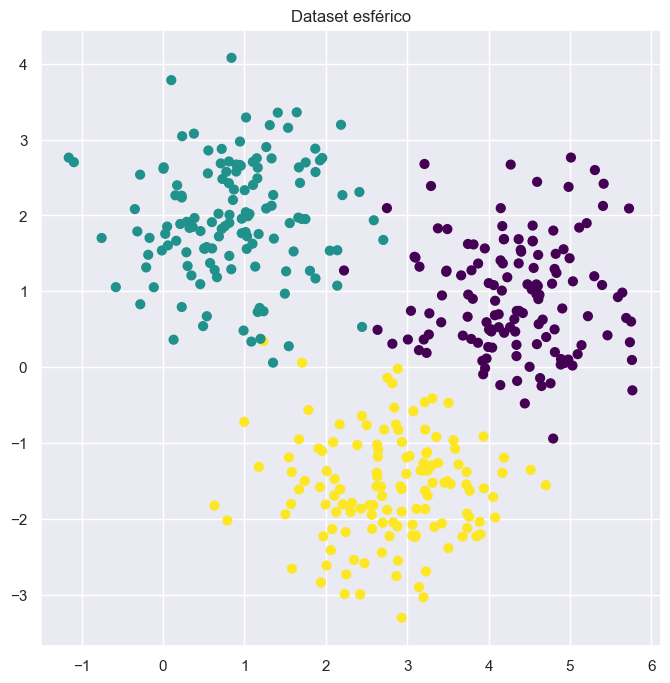

In [4]:
# generamos nuestro dataset original
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=3,
                       cluster_std=0.75, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
# mostramos los datos originales
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
plt.title('Dataset esférico')
plt.show()

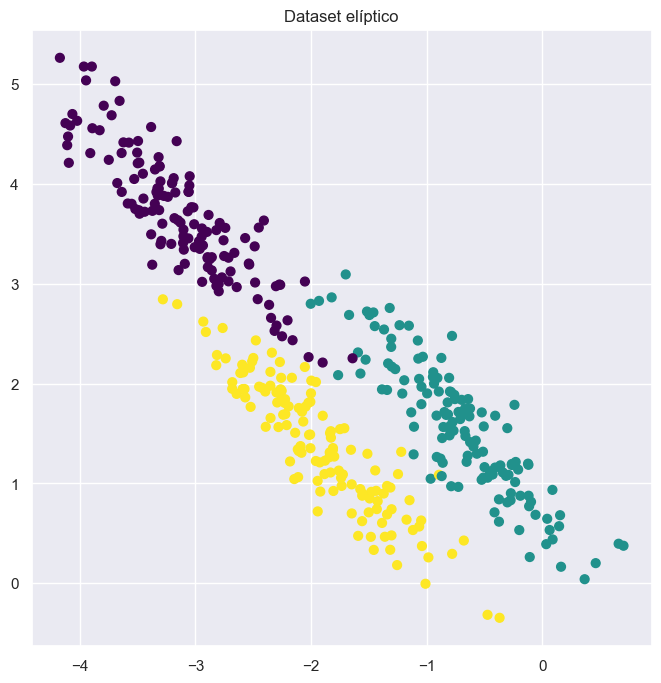

In [5]:
# estiramos los datos
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
# mostramos los datos
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_true, s=40, cmap='viridis')
plt.title('Dataset elíptico')
plt.show()

### Aplicando Kmeans a ambos

In [7]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None, title=''):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

    ax.scatter(centers[:, 0], centers[:, 1], marker='*', c='w', s=300, zorder=3)
    ax.set_title(title)

C:\Users\plane\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


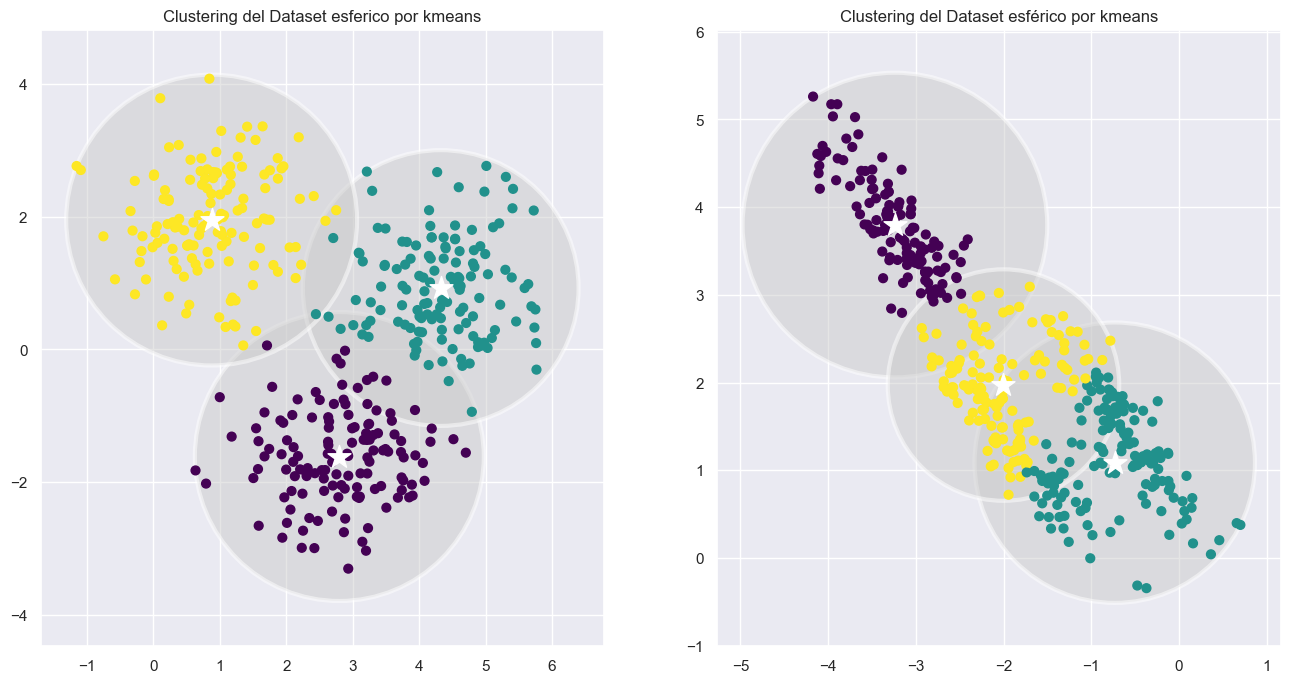

In [9]:
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax = plt.subplots(1,2)

kmeans = KMeans(n_clusters=3, init= 'k-means++', n_init= 'auto')
plot_kmeans(kmeans, X, ax=ax[0], title='Clustering del Dataset esferico por kmeans')

kmeans = KMeans(n_clusters=3)
plot_kmeans(kmeans, X_stretched, ax=ax[1], title='Clustering del Dataset esférico por kmeans')
plt.rcParams['figure.figsize'] = [8, 8]

### Los problemas del Kmeans

podemos observar varios problemas a simple vista:

- El k-means utiliza esferas o hiper-esferas para delimitar los clusters, lo que muchas veces no se ajusta a la distribución real de nuestros datos. Esto es debido a la asunción de **independencia** entre las variables que usamos para clusterizar (covarianza es 0). El tamaño del cluster no es el círculo blanco, sino el punto medio entre centroides.

- El k-means no permite decidir el tamaño de estas hiper-esferas, este tamaño viene dado por la posición de los centroides de cada cluster. Con lo cual, en caso de tener clusters de tamaño dispar, el kmeans no va a poder clasificarlos correctamente.

- El k-means realiza asignaciones deterministas (hard-classification) de las muestras a los clusters, incluso cuando no está claro si pertenecen a uno u otro. Parece útil que si un elemento está entre dos clusters, en vez de asignarlo a uno u a otro, le asignemos un 50% de probabilidad de pertenecer a cada uno.

El modelo probabilistico GMM es resistente a estos problemas.

## Generalizando el algoritmo de k-means (Expectation–Maximitation): Gaussian Mixture Models

Un modelo de mezcla de Gaussianas trata de encontrar una mezcla de distribuciones de probabilidad Gaussianas multidimensionales que sean capaces de **generar** los datos con los que tratamos.

En el caso más sencillo, los GMMs pueden encontrar los clusters de la misma forma que k-means:

In [23]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

In [26]:
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm.fit(X)
#plot_gmm(gmm, X)

GaussianMixture(covariance_type='diag', n_components=3, random_state=42)

GMM es un modelo probabilístico, no solo podemos encontrar a qué cluster pertenece cada muestra, sino también con qué probabilidad.

Esto lo podemos hacer usando la función ``predict_proba``, que devuelve una matriz de tamaño ``[n_samples, n_clusters]`` que mide la probabilidad de cada punto de pertenecer a cada cluster:

[[0.871 0.004 0.125]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.009 0.588 0.403]
 [0.    0.981 0.019]
 [0.    1.    0.   ]
 [0.424 0.576 0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]]




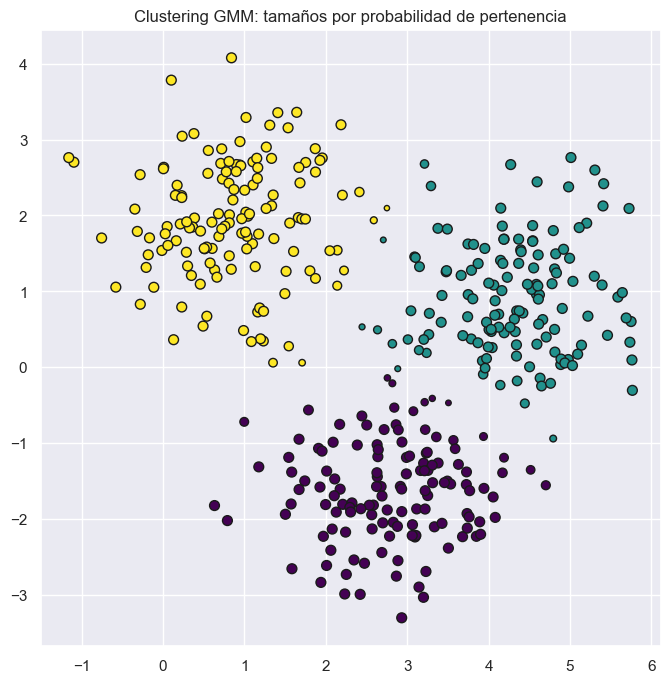

In [27]:
probs = gmm.predict_proba(X)
print(probs[40:50].round(3))
print('\n')
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size, edgecolor='k')
plt.title('Clustering GMM: tamaños por probabilidad de pertenencia')
plt.show()

GMM es tremendamente similar to a un k-means, usa el algoritmo de esperanza-maximización:

1. Escoge unas estimaciones iniciales para la posición ($\mu_k$) y la forma ($\Sigma_k$) de cada cluster (**componente**)

2. Después, repite hasta converger los siguientes pasos:

   1. *Paso E*: para cada elemento de nuestro dataset, encuentra unos pesos ($\hat{z}_{ik}$) codifican la pertenencia de elemento punto a cada componente de nuestro GMM
   2. *Paso M*: para cada cluster (**componente**), actualiza su posición, forma y tamaño, utilizando los pesos anteriores y todas las muestras del dataset para calcular $\hat{\pi}_k$, $\hat{\mu}_k$ y $\hat{\Sigma}_k$

Y al final, cada elemento está asociado con las probabilidades de pertenecer a cada una de las componentes de nuestro GMM (**clusteres**).

Es sensible a la inicialización y puede no encontrar el máximo global, quedándose atrapado en un máximo local. Por ello, en la práctica utilizamos varias ejecuciones con distintas inicializaciones.

La siguiente función permite visualizar las elipses mostrando las curvas de nivel de las gaussianas en 2D:

### GMM en los dataset esféricos y elípticos

In [52]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    plt.title('Clustering por el modelo GMM')

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(xy= position, 
                             width= nsig * width, 
                             height= nsig * height,
                             angle = angle,
                            **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='*', c='w', s=300, zorder=3)

#### Dataset esférico

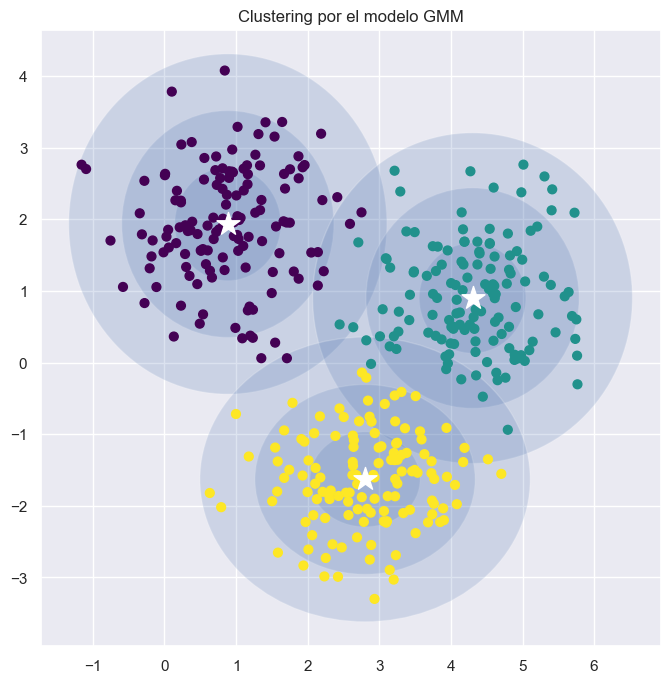

In [53]:
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
plot_gmm(gmm, X)

#### Dataset elíptico

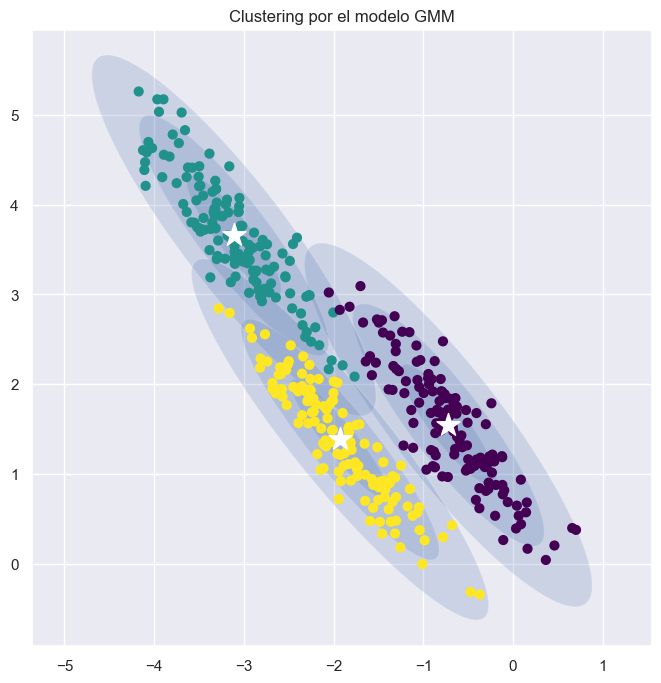

In [54]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

El GMM es capaz de dar solución a las limitaciones del k-means comentadas anteriormente.

Le hemos indicado un parámetro `covariance_type`. Este parámetro simplemente indica cómo va a ser la matriz de covarianzas. Puede tomar los siguientes valores:

- `spherical`: únicamente la diagonal principal de la matriz de covarianzas va a ser distinta de cero, y además todos los valores van a ser iguales
- `diag`: únicamente la diagonal principal de la matriz de covarianzas va a ser distinta de cero.
- `full`: sin restricciones en la matriz de covarianzas.


## GMM como estimador de densidad

Aunque hayamos categorizado al GMM como un algoritmo de clustering, estamos hablando, fundamentalmente, de un algoritmo de estimación de densidad.

Es decir, estamos hablando de un modelo probabilístico generativo capaz de describir la distribución de los datos (y cuanto mejor la describa, mejor seremos capaces de agruparlos).

Por ejemplo, si cogemos como dataset el siguiente:

### GMM en datos con forma no elíptica

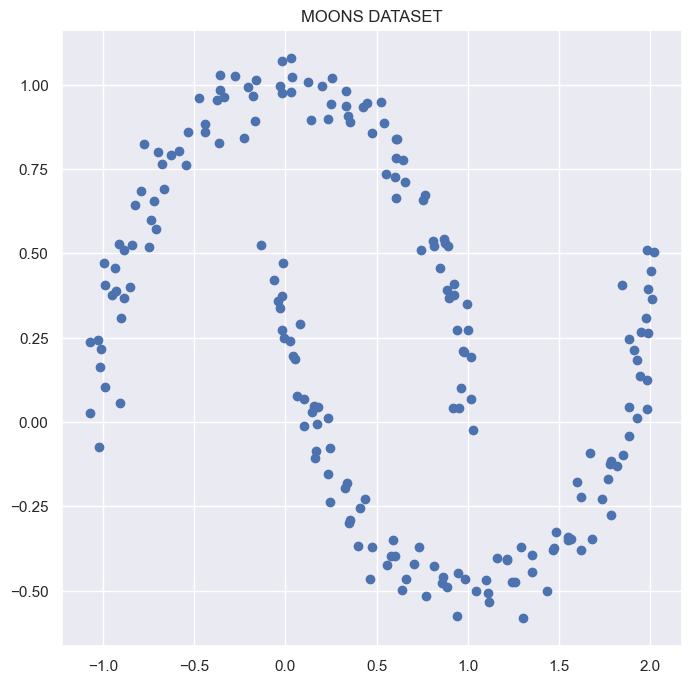

In [55]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])
plt.title('MOONS DATASET')
plt.show()

#### n_components = 2

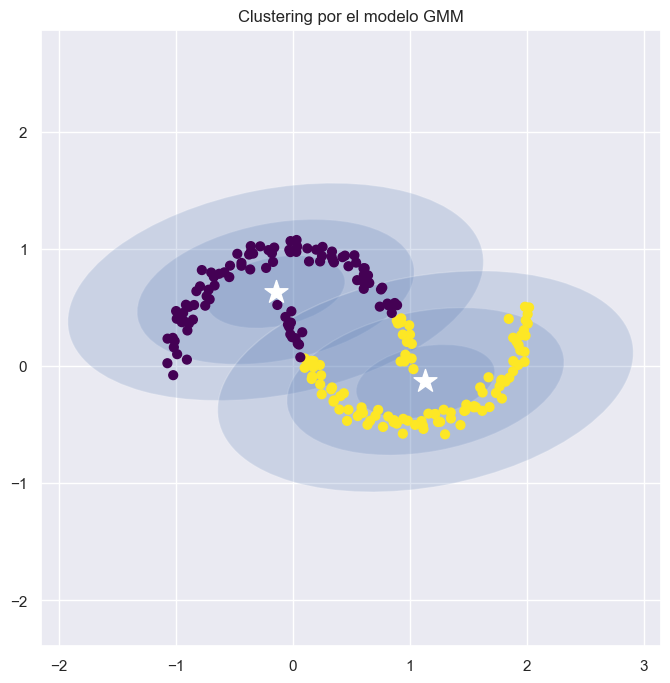

In [56]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

#### n_components = 10

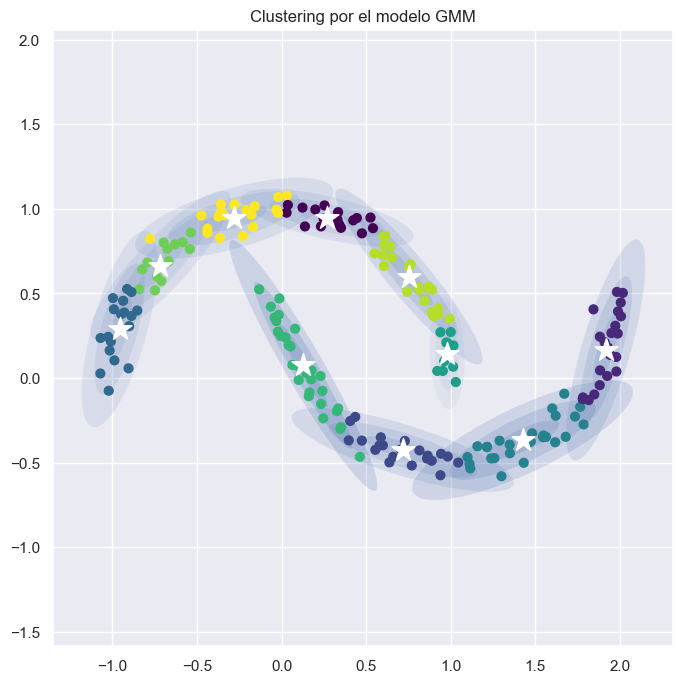

In [58]:
gmm10 = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
plot_gmm(gmm10, Xmoon) # label=False

#### Generando nuevos datos con GMM

GMM es capaz de **generar** perfectamente los datos que tenemos. Lo que está ocurriendo en este caso no es que estemos clusterizando los datos, sino que estamos modelando la *distribución* de los datos, y si quisieramos, podríamos generar más:

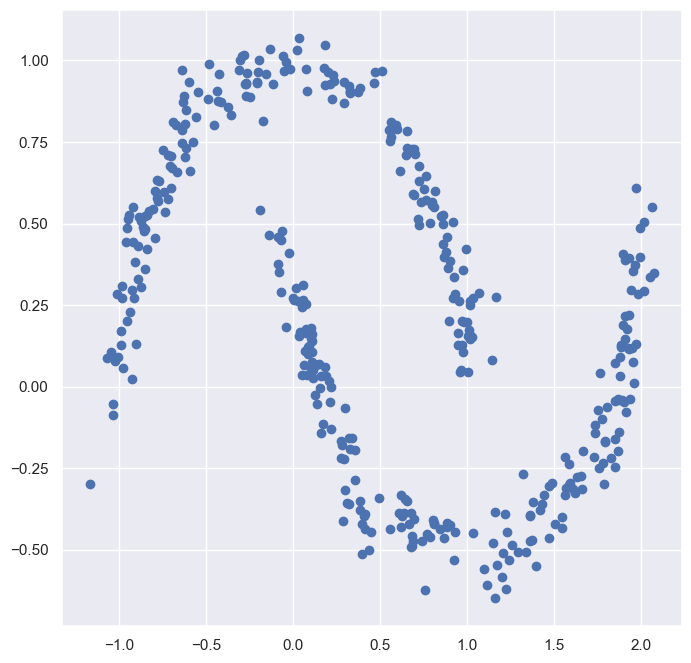

In [59]:
Xnew, y = gmm10.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1]) # nuevas muestras
plt.show()

##  Cómo escogemos cuantos componentes?

The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset.

A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the *likelihood* of the data under the model, using cross-validation to avoid over-fitting.

Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion).
Scikit-Learn's ``GMM`` estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach.

Let's look at the AIC and BIC as a function as the number of GMM components for our moon dataset:

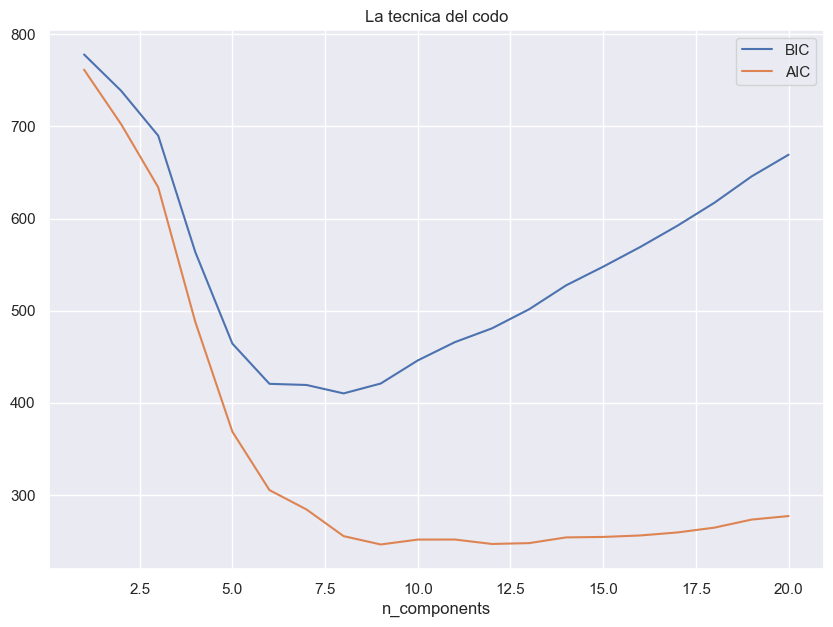

In [60]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', init_params='k-means++' ,random_state=0).fit(Xmoon) for n in n_components]

plt.figure(figsize= (10, 7))
# diferentes métricas
plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')         # esto es parecido a la técnica del codo
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')         # 
plt.title('La tecnica del codo')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

The **optimal number of clusters** is the value that **minimizes the AIC or BIC**, depending on which approximation we wish to use. 

The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice. As is typical with this sort of problem, the BIC recommends a simpler model.

Notice the important point: this **choice of number of components measures how well GMM works *as a density estimator***, not how well it works *as a clustering algorithm*. I'd encourage you to think of **GMM primarily as a density estimator**, and use it for clustering only when warranted within simple datasets.

## GMM en DIGITS dataset 

Vamos a tratar de generar nuevos dígitos similares a los disponibles en el dataset `digits`:

In [61]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

### Inspeccionando el dataset

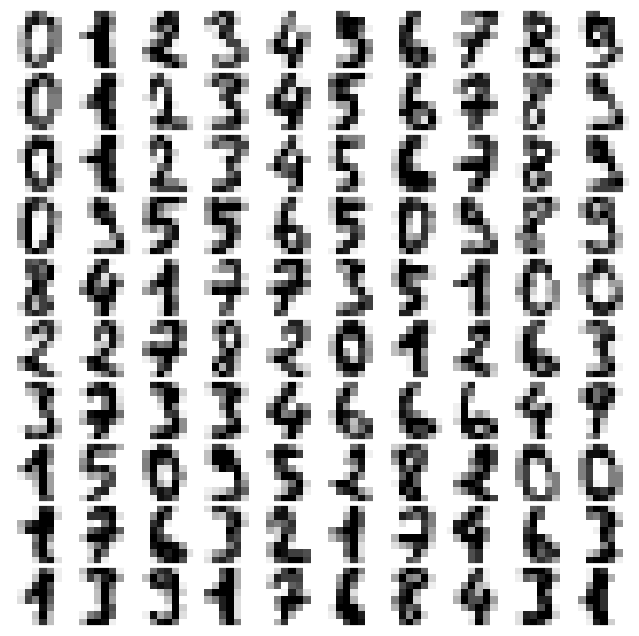

In [62]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

### Encontrando el número óptimo de componentes

Tenemos 1800 dígitos de 8x8 píxels, es decir, 64 dimensiones. ¿cuantas componentes necesitamos para *modelar* nuestros datos 64-dimensionales?:

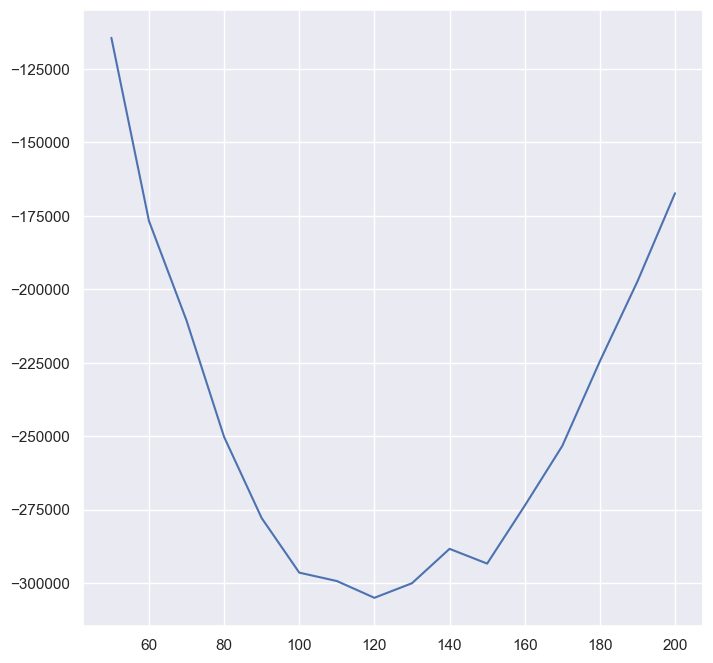

In [63]:
import numpy as np
from sklearn.mixture import GaussianMixture
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', init_params='k-means++', random_state=0) for n in n_components]
aics = [model.fit(digits.data).aic(digits.data) for model in models]
plt.plot(n_components, aics);

De acuerdo al AIC, parece que `n_componentes=110` es una buena estimación. Vamos a crear nuestro modelo GMM y ver si ha convergido:

### GMM con 110 componentes

In [64]:
gmm = GaussianMixture(n_components=110, covariance_type='full', random_state=0)
gmm.fit(digits.data)
print(gmm.converged_)

True


### Creando nuevos datos y visualizandolos

In [65]:
data_new, y_new = gmm.sample(100)
print(data_new.shape)

(100, 64)


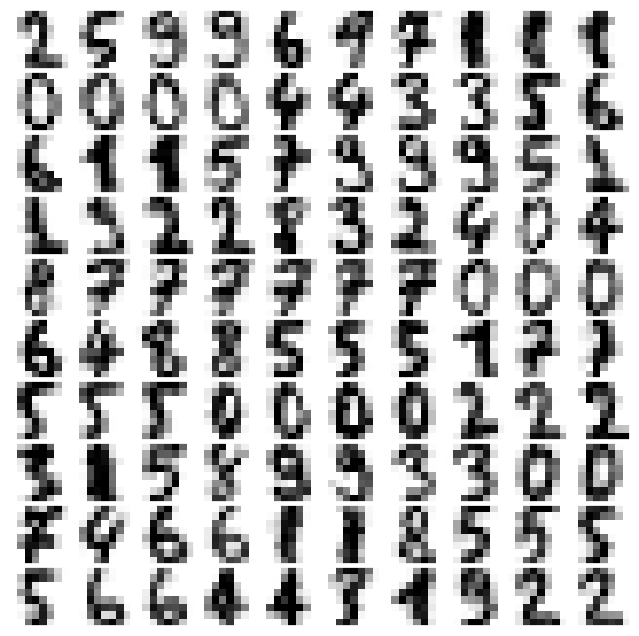

In [66]:
plot_digits(data_new)